## Price Analysis Model for NPA's

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv


#import warnings
#warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("Dataset_RealEstate.csv")

## Missing Values in Dataset

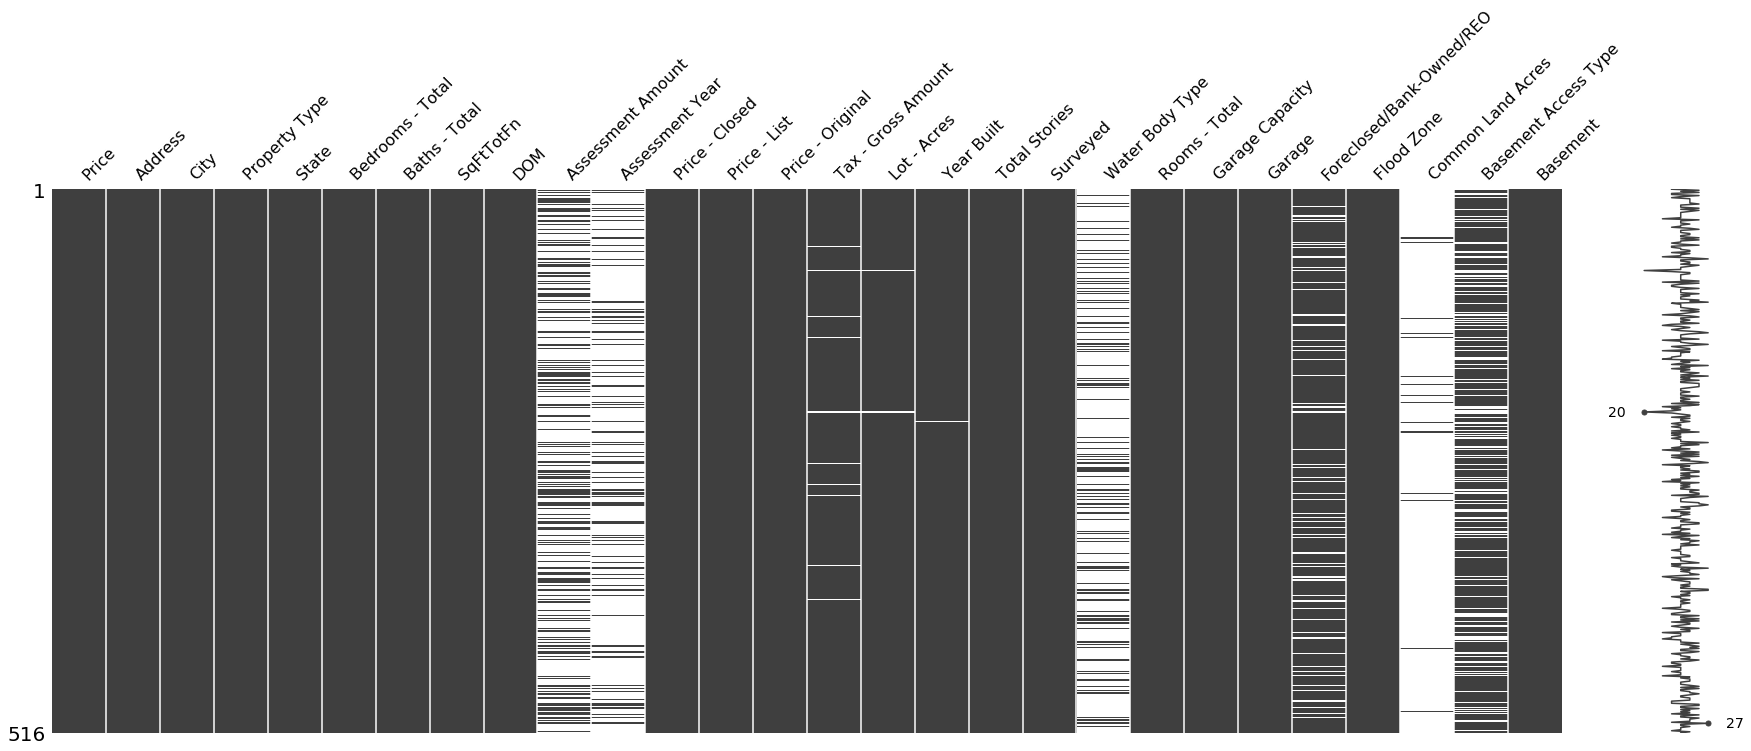

In [3]:
import missingno as msno
msno.matrix(df, figsize = (30,10))

# CORRELATION BETWEEN VARIABLES

In [49]:
df.corr()

,Price,Bedrooms - Total,Baths - Total,SqFtTotFn,DOM,Assessment Year,Price - Closed,Price - List,Price - Original,Lot - Acres,Year Built,Rooms - Total,Garage Capacity,Common Land Acres
Price,1.000000,0.469063,0.615024,0.665639,0.066609,0.026091,1.000000,0.988737,0.519348,0.534724,-0.031448,0.567754,0.334652,-0.156561
Bedrooms - Total,0.469063,1.000000,0.721723,0.713921,0.114486,0.138897,0.469063,0.486237,0.208909,0.114883,-0.278087,0.803245,0.317386,-0.023810
Baths - Total,0.615024,0.721723,1.000000,0.828977,0.164616,0.107694,0.615024,0.612712,0.302214,0.252522,-0.091327,0.758450,0.295774,0.120952
SqFtTotFn,0.665639,0.713921,0.828977,1.000000,0.184968,0.074798,0.665639,0.667320,0.334152,0.298826,-0.119892,0.818594,0.359899,0.264917
DOM,0.066609,0.114486,0.164616,0.184968,1.000000,-0.154861,0.066609,0.077106,0.124767,-0.001595,-0.099686,0.142991,0.040940,-0.005580
Assessment Year,0.026091,0.138897,0.107694,0.074798,-0.154861,1.000000,0.026091,0.013666,0.004152,0.045991,0.002493,0.134418,-0.019797,-0.016320
Price - Closed,1.000000,0.469063,0.615024,0.665639,0.066609,0.026091,1.000000,0.988737,0.519348,0.534724,-0.031448,0.567754,0.334652,-0.156561
Price - List,0.988737,0.486237,0.612712,0.667320,0.077106,0.013666,0.988737,1.000000,0.526062,0.495453,-0.049470,0.569582,0.345208,-0.188452
Price - Original,0.519348,0.208909,0.302214,0.334152,0.124767,0.004152,0.519348,0.526062,1.000000,0.259181,-0.090763,0.270061,0.178471,-0.202485
Lot - Acres,0.534724,0.114883,0.252522,0.298826,-0.001595,0.045991,0.534724,0.495453,0.259181,1.000000,0.046357,0.158198,0.077287,0.967912


In [50]:
df.isnull().sum()

Price                          0
Address                        0
City                           0
Property Type                  0
State                          0
Bedrooms - Total               0
Baths - Total                  0
SqFtTotFn                      0
DOM                            0
Assessment Amount            339
Assessment Year              426
Price - Closed                 0
Price - List                   0
Price - Original               0
Tax - Gross Amount            10
Lot - Acres                    2
Year Built                     1
Total Stories                  0
Surveyed                       0
Water Body Type              406
Rooms - Total                  0
Garage Capacity                0
Garage                         0
Foreclosed/Bank-Owned/REO     65
Flood Zone                     0
Common Land Acres            501
Basement Access Type         123
Basement                       0
dtype: int64

In [69]:
df.drop(['Assessment Amount','Assessment Year','Water Body Type','Common Land Acres','Basement Access Type'],axis=1)

,Price,Address,City,Property Type,State,Bedrooms - Total,Baths - Total,SqFtTotFn,DOM,Price - Closed,...,Lot - Acres,Year Built,Total Stories,Surveyed,Rooms - Total,Garage Capacity,Garage,Foreclosed/Bank-Owned/REO,Flood Zone,Basement
0,25000,154 SPOONER Road,2,1,0,2,1,1100,124,25000,...,2.70,1978.0,2,Unknown,5,0,No,Yes,Unknown,No
1,45000,6711 South Rd,4,1,0,3,1,1124,153,45000,...,1.00,1960.0,1,Unknown,6,0,No,Yes,Yes,Yes
2,175000,3974 Chateauguay Road,1,1,0,3,2,1336,51,175000,...,59.00,1991.0,1,Yes,5,5,Yes,No,Unknown,Yes
3,340000,2000 High Pastures Road,2,1,0,4,3,2800,311,340000,...,5.26,1815.0,2,Unknown,10,2,Yes,No,No,Yes
4,104000,27 Heritage Condo Way,4,0,0,1,1,865,130,104000,...,0.00,1984.0,1.5,Yes,4,0,No,No,No,No
5,59000,4480 Chateauguay Road,1,1,0,2,1,600,49,59000,...,0.33,1970.0,1,Unknown,3,0,No,No,Yes,No
6,206700,2132 South Road,4,1,0,3,3,1662,61,206700,...,1.27,1820.0,1.5,Unknown,8,2,Yes,No,Unknown,Yes
7,1090000,1043 Noah Wood Road,4,1,0,4,5,4734,3,1090000,...,6.40,1998.0,1.5,Yes,12,2,Yes,No,No,Yes
8,95000,138 Barbe Lane,0,1,0,2,1,900,169,95000,...,24.64,1968.0,1.5,Yes,5,0,No,No,No,No
9,330000,2986 Webster Hill Road,0,1,0,3,3,2633,296,330000,...,5.50,1989.0,1.5,Yes,10,3,Yes,No,No,Yes


In [71]:
df.head()

,Price,Address,City,Property Type,State,Bedrooms - Total,Baths - Total,SqFtTotFn,DOM,Assessment Amount,...,Surveyed,Water Body Type,Rooms - Total,Garage Capacity,Garage,Foreclosed/Bank-Owned/REO,Flood Zone,Common Land Acres,Basement Access Type,Basement
0,25000,154 SPOONER Road,2,1,0,2,1,1100,124,NaN,...,Unknown,NaN,5,0,No,Yes,Unknown,NaN,NaN,No
1,45000,6711 South Rd,4,1,0,3,1,1124,153,215200,...,Unknown,NaN,6,0,No,Yes,Yes,NaN,Interior,Yes
2,175000,3974 Chateauguay Road,1,1,0,3,2,1336,51,NaN,...,Yes,NaN,5,5,Yes,No,Unknown,NaN,Interior,Yes
3,340000,2000 High Pastures Road,2,1,0,4,3,2800,311,526000,...,Unknown,NaN,10,2,Yes,No,No,NaN,Walk-up,Yes
4,104000,27 Heritage Condo Way,4,0,0,1,1,865,130,NaN,...,Yes,NaN,4,0,No,No,No,NaN,NaN,No


In [51]:
df.describe()

,Price,Bedrooms - Total,Baths - Total,SqFtTotFn,DOM,Assessment Year,Price - Closed,Price - List,Price - Original,Lot - Acres,Year Built,Rooms - Total,Garage Capacity,Common Land Acres
count,5.160000e+02,516.000000,516.000000,516.000000,516.000000,90.000000,5.160000e+02,5.160000e+02,5.160000e+02,514.000000,515.000000,516.000000,516.000000,15.000000
mean,4.099843e+05,3.156977,2.486434,2224.602713,273.558140,2011.911111,4.099843e+05,4.618603e+05,5.438643e+05,16.291946,1935.846602,7.624031,1.246124,5.733333
std,4.800853e+05,1.184270,1.316737,1268.903404,317.217879,2.684305,4.800853e+05,5.865586e+05,1.132315e+06,56.082938,65.573301,2.821919,1.451977,7.657552
min,2.500000e+04,0.000000,0.000000,0.000000,0.000000,2001.000000,2.500000e+04,2.800000e+04,4.900000e+01,0.000000,1780.000000,1.000000,0.000000,0.000000
25%,1.800000e+05,3.000000,2.000000,1398.500000,62.750000,2011.000000,1.800000e+05,1.933750e+05,1.990000e+05,0.830000,1880.000000,6.000000,0.000000,1.000000
50%,2.800000e+05,3.000000,2.000000,1922.000000,174.000000,2012.000000,2.800000e+05,2.990000e+05,3.290000e+05,3.700000,1968.000000,7.000000,1.000000,7.000000
75%,4.522500e+05,4.000000,3.000000,2810.000000,382.000000,2013.000000,4.522500e+05,4.970000e+05,5.500000e+05,10.500000,1986.500000,9.000000,2.000000,7.000000
max,4.100000e+06,10.000000,9.000000,9500.000000,2054.000000,2016.000000,4.100000e+06,5.000000e+06,2.199000e+07,855.000000,2014.000000,20.000000,22.000000,31.000000


In [52]:
#What are the different data types in our Dataset
df.dtypes

Price                          int64
Address                       object
City                          object
Property Type                 object
State                         object
Bedrooms - Total               int64
Baths - Total                  int64
SqFtTotFn                      int64
DOM                            int64
Assessment Amount             object
Assessment Year              float64
Price - Closed                 int64
Price - List                   int64
Price - Original               int64
Tax - Gross Amount            object
Lot - Acres                  float64
Year Built                   float64
Total Stories                 object
Surveyed                      object
Water Body Type               object
Rooms - Total                  int64
Garage Capacity                int64
Garage                        object
Foreclosed/Bank-Owned/REO     object
Flood Zone                    object
Common Land Acres            float64
Basement Access Type          object
B

## Feature: Price

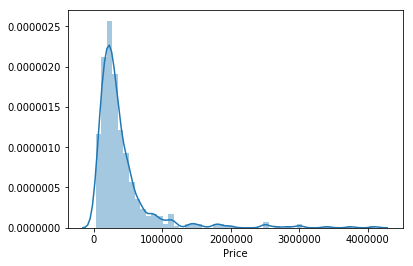

In [53]:
sns.distplot(df.Price)

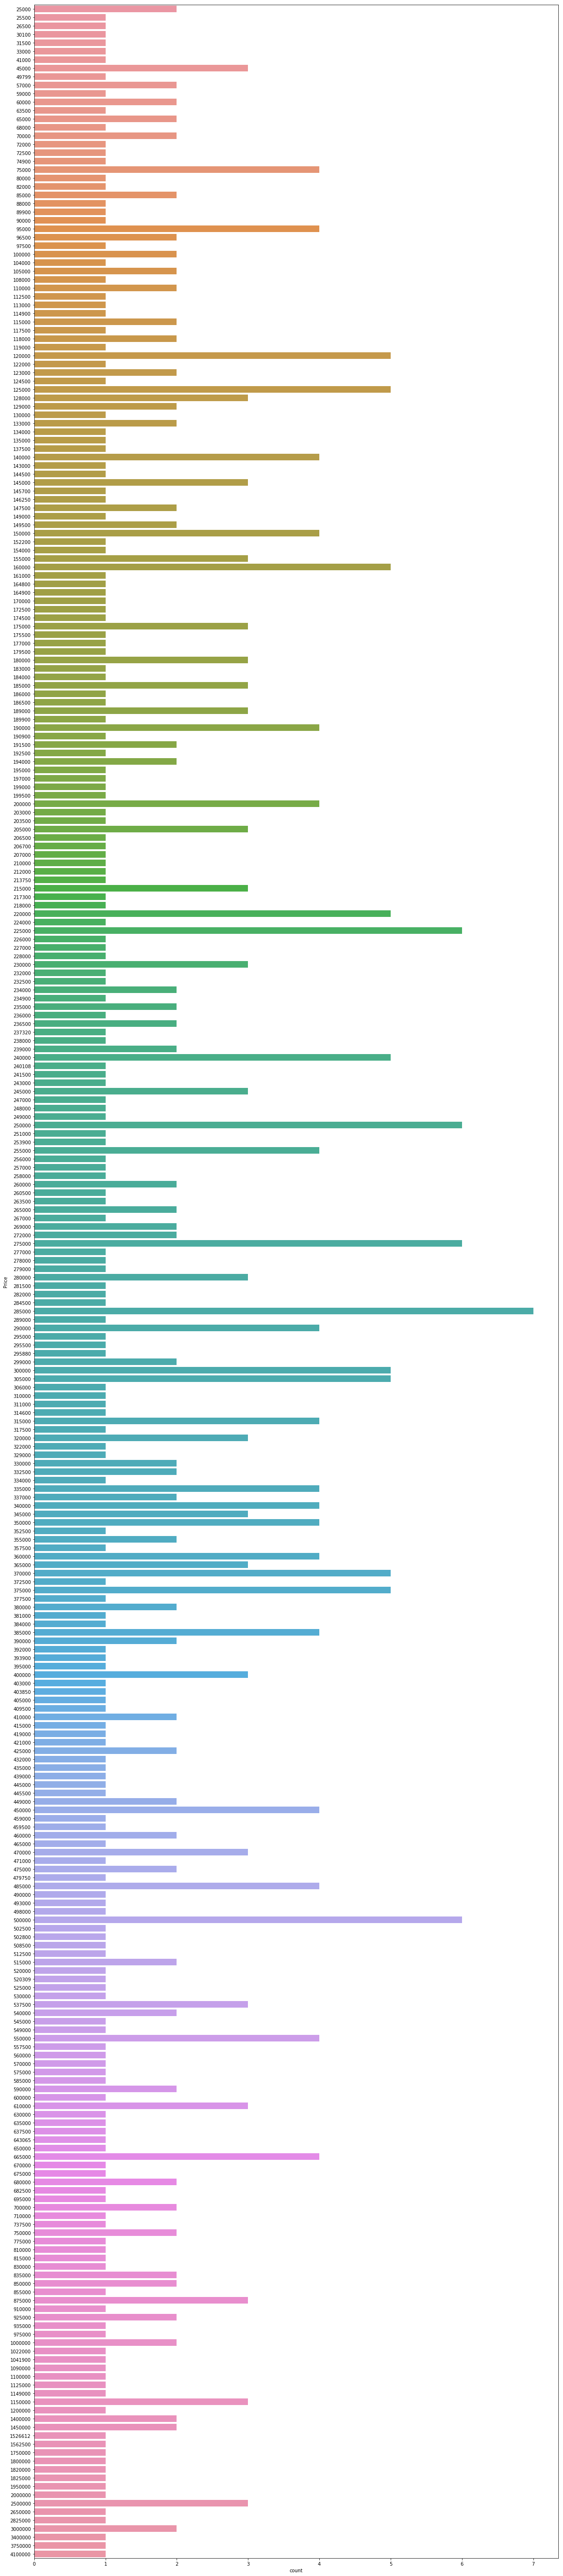

In [54]:
plt.figure(figsize=(20, 100))
sns.countplot(y="Price", data=df);

## Feature: Area (SqFtTotFn)

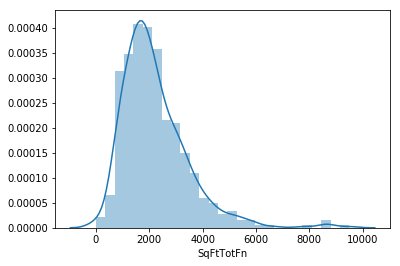

In [55]:
sns.distplot(df.SqFtTotFn)

## Feature: garage

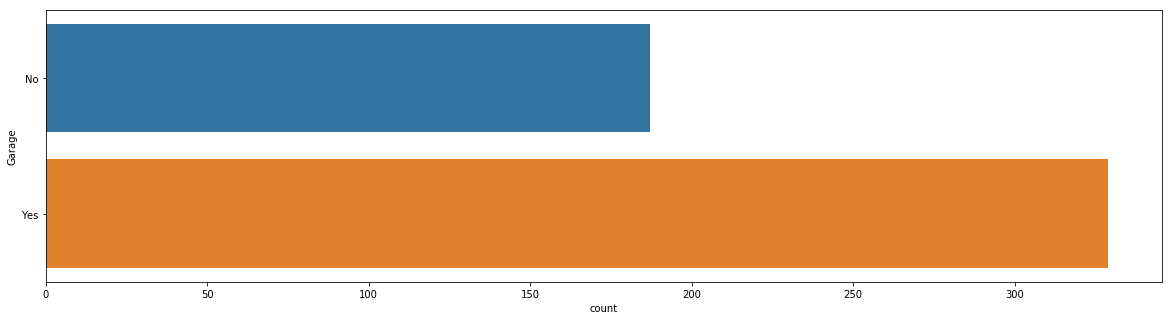

In [56]:
# Do the Real Estates normally have garages?
plt.figure(figsize=(20, 5))
sns.countplot(y="Garage", data=df);

## Feature: Total bedrooms

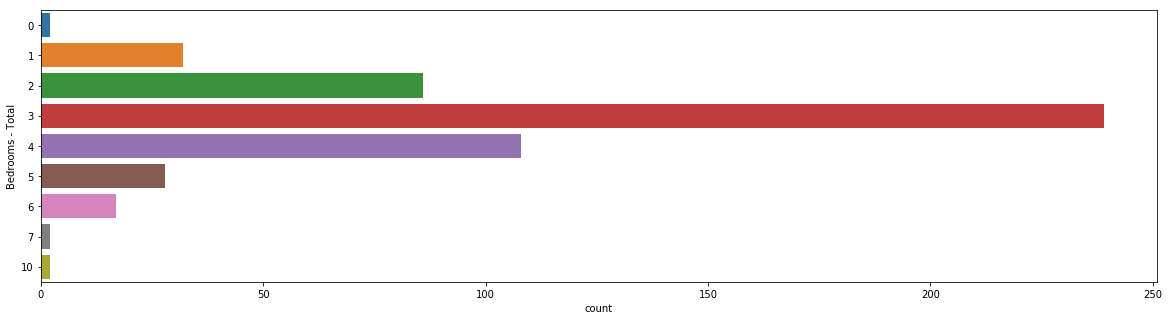

In [57]:
# Various No.of bedrooms ?
plt.figure(figsize=(20, 5))
sns.countplot(y="Bedrooms - Total", data=df);

## Feature: Total bathrooms

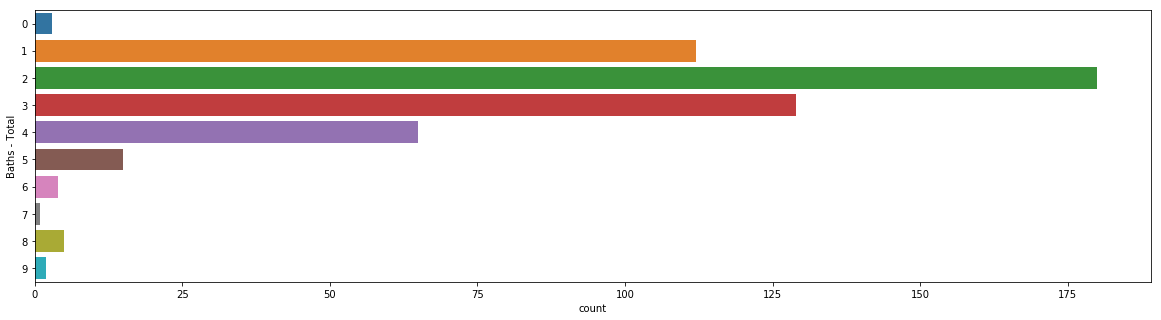

In [58]:
plt.figure(figsize=(20, 5))
sns.countplot(y="Baths - Total", data=df);

## Feature: Address

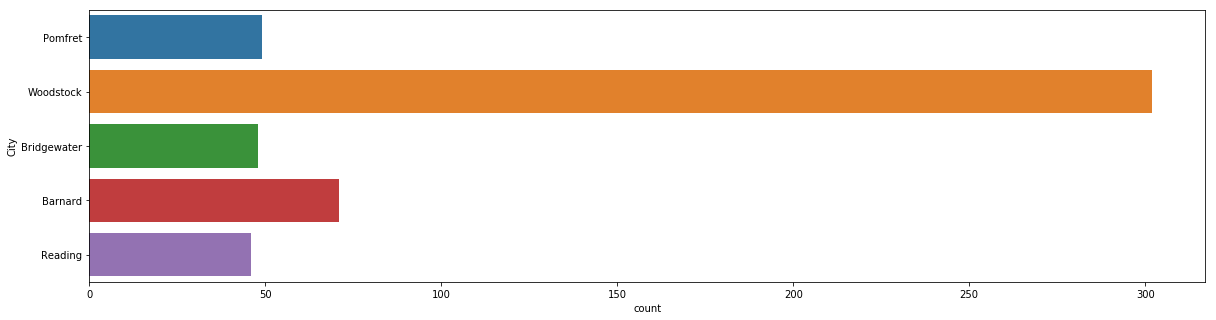

In [59]:
plt.figure(figsize=(20, 5))
sns.countplot(y="City", data=df);

In [60]:
df.Address.value_counts()

17 High Street                  4
28 W Heritage Condo Way         3
700 John Darling Road           3
1670 Church Hill Road           2
2632 Church Hill Rd.            2
000 Mountain Ave                2
126 Rogers Road                 2
160 Cowdrey Path                2
5683/A-1 West Woodstock Road    2
204 Willow Brook Road           2
205 Britton Lane                2
234 River Road                  2
236-S Blake Hill Road           2
39A Elm Street                  2
3 Border Lane                   2
50 NORTH RD                     2
529 Stage Road                  2
1537 Vermont Route 12           2
2519 Cox District Road          2
10 Lincoln St                   2
11 Church Street                2
335 North Puckerbrush           2
295 Old Stage Coach Road        2
7265 Route 4                    2
441 Austin Road                 2
11 Church Street #3             2
488 Kittridge Pasture           2
19 Garnet Hill                  2
6386 VT Rt 12                   1
3480 Hartland 

In [61]:
df.head()

,Price,Address,City,Property Type,State,Bedrooms - Total,Baths - Total,SqFtTotFn,DOM,Assessment Amount,...,Surveyed,Water Body Type,Rooms - Total,Garage Capacity,Garage,Foreclosed/Bank-Owned/REO,Flood Zone,Common Land Acres,Basement Access Type,Basement
0,25000,154 SPOONER Road,Pomfret,Single Family,VT,2,1,1100,124,NaN,...,Unknown,NaN,5,0,No,Yes,Unknown,NaN,NaN,No
1,45000,6711 South Rd,Woodstock,Single Family,VT,3,1,1124,153,215200,...,Unknown,NaN,6,0,No,Yes,Yes,NaN,Interior,Yes
2,175000,3974 Chateauguay Road,Bridgewater,Single Family,VT,3,2,1336,51,NaN,...,Yes,NaN,5,5,Yes,No,Unknown,NaN,Interior,Yes
3,340000,2000 High Pastures Road,Pomfret,Single Family,VT,4,3,2800,311,526000,...,Unknown,NaN,10,2,Yes,No,No,NaN,Walk-up,Yes
4,104000,27 Heritage Condo Way,Woodstock,Condo,VT,1,1,865,130,NaN,...,Yes,NaN,4,0,No,No,No,NaN,NaN,No


In [62]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()  

In [63]:
# Encode labels for Categorical columns. 
df['City']= label_encoder.fit_transform(df['City']) 
df['Property Type']= label_encoder.fit_transform(df['Property Type']) 
df['State']= label_encoder.fit_transform(df['State']) 

In [64]:
df.head()

,Price,Address,City,Property Type,State,Bedrooms - Total,Baths - Total,SqFtTotFn,DOM,Assessment Amount,...,Surveyed,Water Body Type,Rooms - Total,Garage Capacity,Garage,Foreclosed/Bank-Owned/REO,Flood Zone,Common Land Acres,Basement Access Type,Basement
0,25000,154 SPOONER Road,2,1,0,2,1,1100,124,NaN,...,Unknown,NaN,5,0,No,Yes,Unknown,NaN,NaN,No
1,45000,6711 South Rd,4,1,0,3,1,1124,153,215200,...,Unknown,NaN,6,0,No,Yes,Yes,NaN,Interior,Yes
2,175000,3974 Chateauguay Road,1,1,0,3,2,1336,51,NaN,...,Yes,NaN,5,5,Yes,No,Unknown,NaN,Interior,Yes
3,340000,2000 High Pastures Road,2,1,0,4,3,2800,311,526000,...,Unknown,NaN,10,2,Yes,No,No,NaN,Walk-up,Yes
4,104000,27 Heritage Condo Way,4,0,0,1,1,865,130,NaN,...,Yes,NaN,4,0,No,No,No,NaN,NaN,No


In [66]:
df['Tax - Gross Amount'].astype(str).astype(int)

ValueError: invalid literal for int() with base 10: 'nan'

In [65]:
X= df[['Tax - Gross Amount']]
#Handling missing values using KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
imputer = imputer.fit(X.iloc[:,0:5])
X.iloc[:,0:5] = imputer.transform(X.iloc[:,0:5])

ValueError: could not convert string to float: '-'

In [ ]:
X